# Classification with Hundred Hammers

In this notebook we will explain how to use the HundredHammers library to perfom a basic model selection and hyperparameter optimization for a classification problem. 

To do this, we will use one of the example datasets available in the scikit-learn library.

In [103]:
from sklearn.datasets import load_iris

import logging
import hundred_hammers as hh
# from hundred_hammers import HundredHammersClassifier, plot_batch_results, plot_confusion_matrix, hh_logger
from hundred_hammers.model_zoo import (
    DummyClassifier,
    KNeighborsClassifier,
    RidgeClassifier,
    DecisionTreeClassifier
)

import warnings
from sklearn.exceptions import ConvergenceWarning

First we store the data in the X (input) and y (target) variables.

In [104]:
data = load_iris()
X = data.data
y = data.target

We are going to first train some models with their default configuration. If you don't specify the models that you want to use, some classifiers will be chosen for you.

To see which models are chosen by default, you can check the ```DEFAULT_CLASSIFICATION_MODELS``` variable

In [105]:
hh.model_zoo.DEFAULT_CLASSIFICATION_MODELS

[('Dummy', DummyClassifier(strategy='most_frequent'), {}),
 ('Decision Tree', DecisionTreeClassifier(random_state=0), {}),
 ('SVC', SVC(gamma='auto'), {}),
 ('Linear SVC', LinearSVC(dual='auto', random_state=0, tol=1e-05), {}),
 ('Perceptron', Perceptron(), {}),
 ('Logistic Regression', LogisticRegression(random_state=0), {}),
 ('Ridge Classifier', RidgeClassifier(random_state=0), {}),
 ('SGD Classifier', SGDClassifier(random_state=0), {}),
 ('Passive Aggressive Classifier',
  PassiveAggressiveClassifier(random_state=0),
  {}),
 ('K Neighbors Classifier', KNeighborsClassifier(), {}),
 ('Neural Network Classifier', MLPClassifier(random_state=0), {}),
 ('Gaussian Process Classifier',
  GaussianProcessClassifier(random_state=0),
  {}),
 ('Random Forest Classifier', RandomForestClassifier(random_state=0), {}),
 ('AdaBoost Classifier', AdaBoostClassifier(random_state=0), {}),
 ('Gradient Boosting Classifier',
  GradientBoostingClassifier(random_state=0),
  {}),
 ('Extra Trees Classifier', E

Notice that it is composed of a list of tuples. Each tuple contains the name we give to the classifier, an instance of the class that implements the classifier and a grid of hyperparameters (which now is empty, but will be explained later).

Those are the models that we are going to use now.

## Evaluation with default models

First create the HundredHammersClassifier object

In [106]:
hh_models = hh.HundredHammersClassifier()

Then evaluate the models. Apart from the actual data (the variables X and y), you can pass other parameters. ```optim_hyper``` check whether we want to optimize the hyperparameters of the models and n_grid_points controls how many values from each hyperparameter to check in the optimization.

Since we don't want to optimize the hyperparameters, optim_hyper will stay as false.

In [107]:
# configure the logger
hh.hh_logger.setLevel(logging.WARNING)

# Evaluate the models and store the results in a variable
df_results = hh_models.evaluate(X, y, optim_hyper=False)

Notice the line above the evaluation of the models. This configures the logger to only show warnings (of which there should be none). The setting you most likely would want to use in an interactive enviroment would be logging.INFO, since you get information about each model in "real time". 

If you want to see more detailed information, you can set the level to logging.DEBUG. It outputs a lot of information, but it might be useful if you encounter a bug.

For the purposes of this notebook, it will be kept to WARNING but you are welcome to change it if you are running this notebook locally.

We can now show the results of our execution

In [108]:
df_results

,Model,Avg ACC (Validation Train),Std ACC (Validation Train),Avg ACC (Validation Test),Std ACC (Validation Test),Avg ACC (Train),Std ACC (Train),Avg ACC (Test),Std ACC (Test),Avg F1W (Validation Train),Std F1W (Validation Train),Avg F1W (Validation Test),Std F1W (Validation Test),Avg F1W (Train),Std F1W (Train),Avg F1W (Test),Std F1W (Test)
0,Dummy,0.363542,0.015763,0.282500,0.074204,0.353333,0.009280,0.253333,0.037118,0.533037,0.016816,0.435292,0.090975,0.522098,0.010132,0.402852,0.047389
1,Decision Tree,1.000000,0.000000,0.943333,0.042295,1.000000,0.000000,0.943333,0.057831,1.000000,0.000000,0.943146,0.042596,1.000000,0.000000,0.943393,0.057788
2,SVC,0.980208,0.014321,0.964167,0.035365,0.984167,0.005833,0.986667,0.022111,0.980242,0.014278,0.964147,0.035396,0.984186,0.005817,0.986684,0.022095
3,Linear SVC,0.966042,0.011564,0.953333,0.051126,0.966667,0.009129,0.946667,0.052068,0.966108,0.011551,0.953081,0.051399,0.966692,0.009149,0.946336,0.052579
4,Perceptron,0.741667,0.132501,0.745000,0.160000,0.821667,0.120658,0.776667,0.149852,0.803655,0.100473,0.803795,0.130694,0.873009,0.063445,0.836725,0.095660
5,Logistic Regression,0.974583,0.013202,0.958333,0.038188,0.977500,0.007500,0.963333,0.040689,0.974616,0.013181,0.958567,0.038013,0.977518,0.007501,0.963161,0.040893
6,Ridge Classifier,0.850417,0.020599,0.827500,0.077285,0.848333,0.008165,0.870000,0.037859,0.852979,0.019015,0.831887,0.073722,0.850607,0.007232,0.870388,0.037128
7,SGD Classifier,0.790000,0.108180,0.784167,0.135833,0.886667,0.079687,0.856667,0.107548,0.832980,0.080551,0.827249,0.100845,0.902333,0.051079,0.872412,0.068566
8,Passive Aggressive Classifier,0.812292,0.090487,0.789167,0.117972,0.854167,0.083354,0.826667,0.138884,0.845481,0.062257,0.821312,0.096434,0.874780,0.057987,0.840742,0.122908
9,K Neighbors Classifier,0.975833,0.012576,0.960833,0.038559,0.975000,0.012360,0.963333,0.037859,0.975856,0.012539,0.960994,0.038379,0.974999,0.012356,0.963432,0.037820


That's an ok way of displaying the result, but tables can sometimes be hard to read, this is why we also implement a couple of functions to display the information of the table in a more readable format.

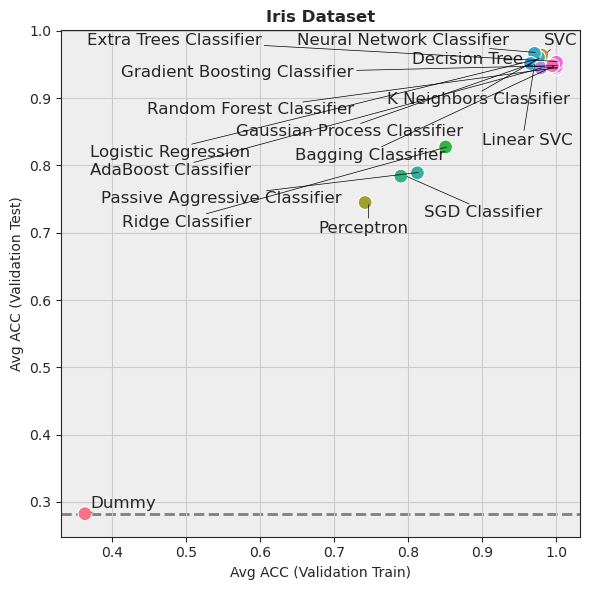

In [109]:
hh.plot_batch_results(df_results, metric_name="ACC", title="Iris Dataset", display=False)

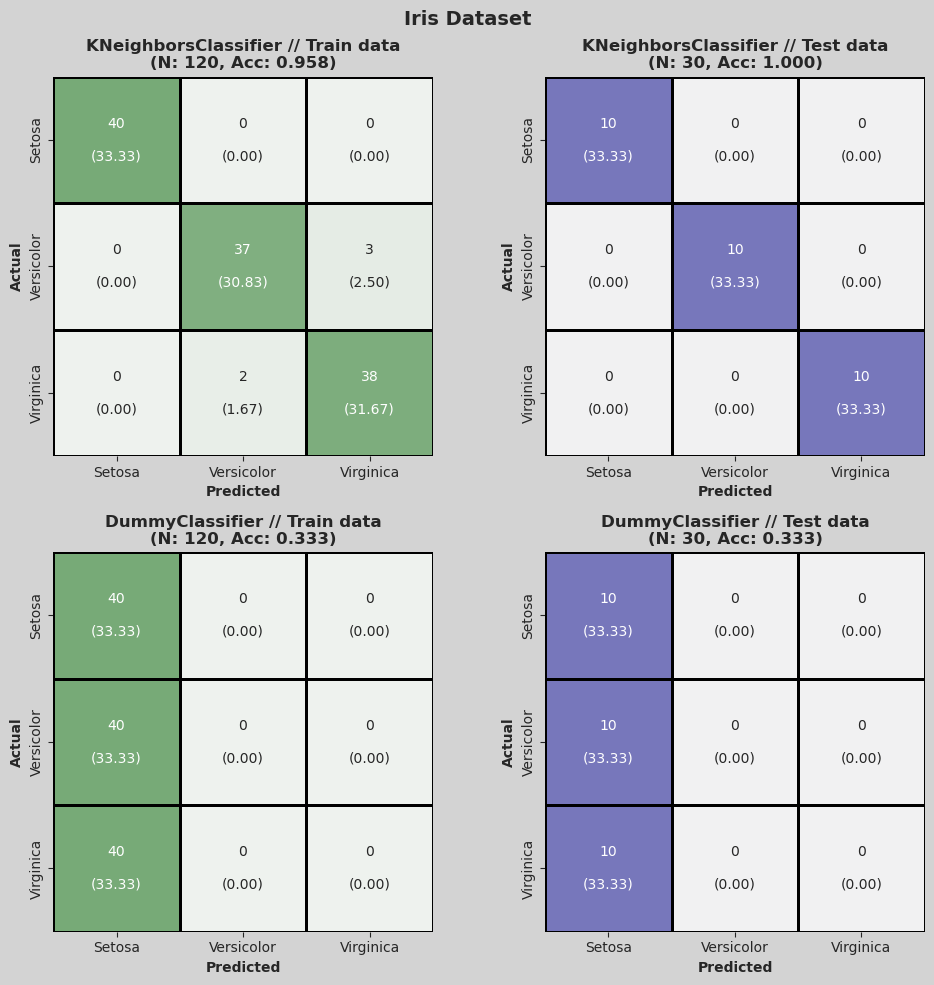

In [110]:
hh.plot_confusion_matrix(X, y, class_dict={0: "Setosa", 1: "Versicolor", 2: "Virginica"},
                        model=KNeighborsClassifier(), title="Iris Dataset", display=False)

In case we needed to use one of the trained models, we can take it from the ```trained_models``` attribute from the ```HundredHammersClassifier``` class. This value will consist on a list with tuples containing the name of the model and the trained model.

In [111]:
hh_models.trained_models

[('Dummy',
  DummyClassifier(random_state=1976069, strategy='most_frequent'),
  {}),
 ('Decision Tree', DecisionTreeClassifier(random_state=4891518), {}),
 ('SVC', SVC(gamma='auto', random_state=2282497), {}),
 ('Linear SVC', LinearSVC(dual='auto', random_state=174106, tol=1e-05), {}),
 ('Perceptron', Perceptron(random_state=5824256), {}),
 ('Logistic Regression', LogisticRegression(random_state=1743372), {}),
 ('Ridge Classifier', RidgeClassifier(random_state=225603), {}),
 ('SGD Classifier', SGDClassifier(random_state=9360960), {}),
 ('Passive Aggressive Classifier',
  PassiveAggressiveClassifier(random_state=5572131),
  {}),
 ('K Neighbors Classifier', KNeighborsClassifier(), {}),
 ('Neural Network Classifier', MLPClassifier(random_state=7851347), {}),
 ('Gaussian Process Classifier',
  GaussianProcessClassifier(random_state=395667),
  {}),
 ('Random Forest Classifier',
  RandomForestClassifier(random_state=8642871),
  {}),
 ('AdaBoost Classifier', AdaBoostClassifier(random_state=49

## Automatic optimization of hyperparameters

In case we want to choose the models we want to evaluate, we must indicate them to the ```HundredHammersClassifier``` class.

For this example, we will use four simple classifier models.

In [112]:
models_to_check = [
    ('Dummy', DummyClassifier(), None),
    ('Decision Tree', DecisionTreeClassifier(random_state=0), None),
    ('Ridge Classifer', RidgeClassifier(random_state=0), None),    
    ('KNN', KNeighborsClassifier(), None)
]

Each model has a name and an object that implements it. The third position in the tuple represents the user-specified grid of hyperparameters, however, we will let it be automatially generated.

This will only be the case for already configured models, if you want automatic generation of hyperparameters for a model that is not alreday added, check the "example_add_model.ipynb" notebook.

We can now proceed passing these models to the ```HundredHammersClassifier``` class.

In [113]:
hh_models = hh.HundredHammersClassifier(models = models_to_check)

This time, since we want to optimize the hyperparameters of our models, we set the appropiate parameter to ```True```.

We can configure how many parameters to check in the GridSearch step, ```n_grid_points``` will indicate how many values each of the hyperparameters will take. In this case, we will take 8 values for each one. 
In the case of categorical values, if there are less than 8 values, only those will be taken.

In [114]:
df_results = hh_models.evaluate(X, y, optim_hyper=True, n_grid_points=8)
display(df_results)

,Model,Avg ACC (Validation Train),Std ACC (Validation Train),Avg ACC (Validation Test),Std ACC (Validation Test),Avg ACC (Train),Std ACC (Train),Avg ACC (Test),Std ACC (Test),Avg F1W (Validation Train),Std F1W (Validation Train),Avg F1W (Validation Test),Std F1W (Validation Test),Avg F1W (Train),Std F1W (Train),Avg F1W (Test),Std F1W (Test)
0,Dummy,0.359167,0.017210,0.289167,0.065833,0.350833,0.011456,0.263333,0.045826,0.528276,0.018495,0.444503,0.080577,0.519326,0.012505,0.414757,0.058765
1,Decision Tree,0.687292,0.021700,0.626667,0.090123,0.679167,0.016351,0.616667,0.065405,0.795132,0.016491,0.735518,0.084869,0.788824,0.012671,0.728266,0.055149
2,Ridge Classifer,0.864583,0.023199,0.831667,0.071667,0.855833,0.018653,0.793333,0.081377,0.865884,0.022321,0.832488,0.071528,0.857072,0.018514,0.796322,0.082893
3,KNN,1.000000,0.000000,0.942500,0.041575,1.000000,0.000000,0.956667,0.026034,1.000000,0.000000,0.942401,0.041679,1.000000,0.000000,0.956676,0.025974


Now that we have optimized the hyperparameters of the models, we can check which hyperparameters were chosen for each. This is done by checking the ```best_params``` attribute.

In [115]:
hh_models.best_params

[('Dummy', {'strategy': 'prior'}),
 ('Decision Tree', {'criterion': 'gini', 'max_depth': 1}),
 ('Ridge Classifer', {'alpha': 1e-10}),
 ('KNN', {'metric': 'manhattan', 'n_neighbors': 1})]

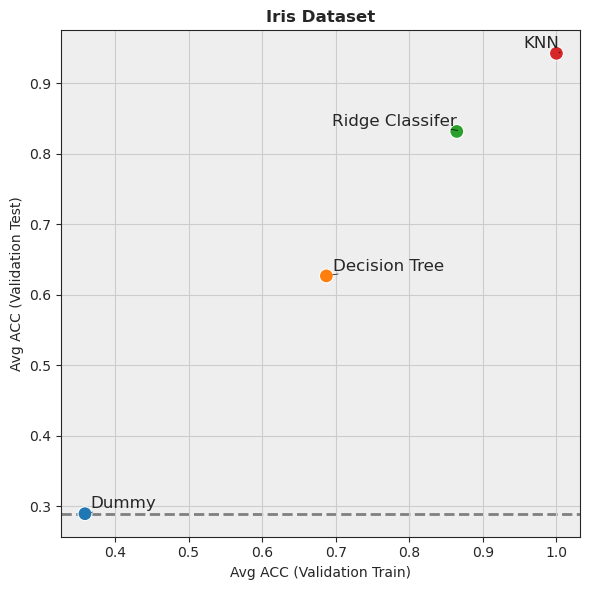

In [116]:
hh.plot_batch_results(df_results, metric_name="ACC", title="Iris Dataset", display=False)

## Selection of models and optimization of hyperparameters

For this example, we will use four simple classifier models with grids of hyperparameters. 

These grid will contain all the paramaters that the gridsearch optimization will use.

In [117]:
models_to_check = [
    ('Dummy', DummyClassifier(), {'strategy': ['most_frequent']}),
    
    ('Decision Tree', DecisionTreeClassifier(random_state=0), 
    {
        "criterion": ['gini', 'entropy', 'log_loss'],
        "max_depth": [1, 2, 3, 4, 5, 6, 7]
    }),

    ('Ridge Classifer', RidgeClassifier(random_state=0), 
    {
        "alpha": [1e-4, 1e-3, 1e-2, 0.1, 1, 10]
    }),
    
    ('KNN', KNeighborsClassifier(), 
    {
        "n_neighbors": [1, 3, 5, 7, 9, 11],
        "metric": ['manhattan', 'euclidean']
    })
]

We can now proceed passing these models to the ```HundredHammersClassifier``` class.

In [118]:
hh_models = hh.HundredHammersClassifier(models = models_to_check)

Since we want to optimize the hyperparameters of our models, we set the appropiate parameter to ```True```. We don't need to set the ```n_grid_points``` parameter since we have already chosen which parameters to take in the GridSearch step.

In [119]:
df_results = hh_models.evaluate(X, y, optim_hyper=True)
display(df_results)

,Model,Avg ACC (Validation Train),Std ACC (Validation Train),Avg ACC (Validation Test),Std ACC (Validation Test),Avg ACC (Train),Std ACC (Train),Avg ACC (Test),Std ACC (Test),Avg F1W (Validation Train),Std F1W (Validation Train),Avg F1W (Validation Test),Std F1W (Validation Test),Avg F1W (Train),Std F1W (Train),Avg F1W (Test),Std F1W (Test)
0,Dummy,0.360833,0.018253,0.288333,0.078546,0.3525,0.014458,0.256667,0.057831,0.530052,0.019446,0.441747,0.096426,0.521090,0.015620,0.404918,0.077612
1,Decision Tree,0.684375,0.021475,0.585833,0.079237,0.6700,0.011902,0.653333,0.047610,0.792592,0.016500,0.696390,0.077504,0.781424,0.008268,0.761909,0.033497
2,Ridge Classifer,0.857500,0.020353,0.830000,0.080726,0.8525,0.008375,0.823333,0.044845,0.858827,0.019894,0.827444,0.084415,0.853210,0.008626,0.822725,0.041641
3,KNN,1.000000,0.000000,0.957500,0.037722,1.0000,0.000000,0.923333,0.047258,1.000000,0.000000,0.957780,0.037573,1.000000,0.000000,0.923810,0.047097


Now that we have optimized the hyperparameters of the models, we can check which hyperparameters were chosen for each. This is done by checking the ```best_params``` attribute.

In [120]:
hh_models.best_params

[('Dummy', {'strategy': 'most_frequent'}),
 ('Decision Tree', {'criterion': 'gini', 'max_depth': 1}),
 ('Ridge Classifer', {'alpha': 0.0001}),
 ('KNN', {'metric': 'manhattan', 'n_neighbors': 1})]

We can also show the plots like last time.

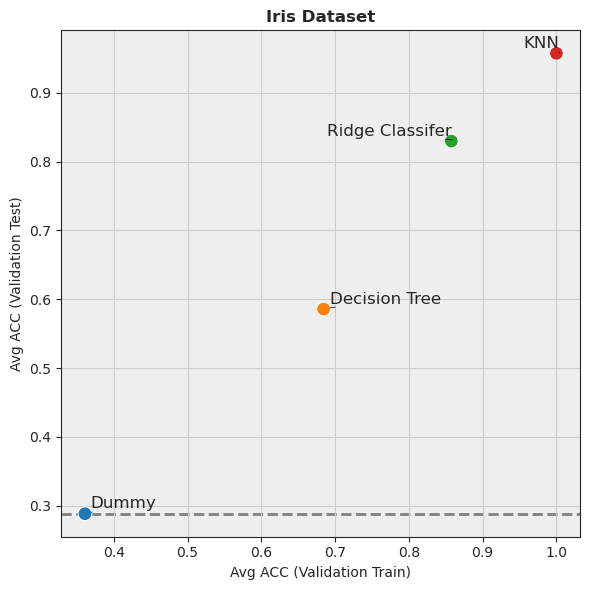

In [121]:
hh.plot_batch_results(df_results, metric_name="ACC", title="Iris Dataset", display=False)